<a href="https://colab.research.google.com/github/mjs1995/study/blob/main/oop/config.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Config Parser

https://kishstats.com/python/2018/03/07/python-config-parser.html

In [ ]:
# config_file_create.py
from configparser import ConfigParser

config = ConfigParser()

In [ ]:
config['settings'] = {
    'debug': 'true',
    'secret_key': 'abc123',
    'log_path': '/my_app/log'
}

config['db'] = {
    'db_name': 'myapp_dev',
    'db_host': 'localhost',
    'db_port': '8889'
}

config['files'] = {
    'use_cdn': 'false',
    'images_path': '/my_app/images'
}
with open('./dev.ini', 'w') as f:
      config.write(f)

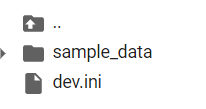

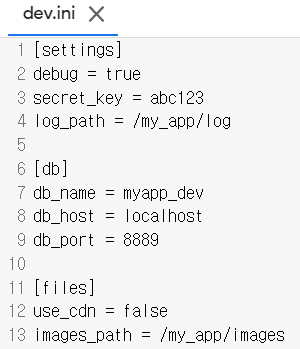

In [ ]:
from configparser import ConfigParser

parser = ConfigParser()
parser.read('dev.ini')

['dev.ini']

- sections(): 모든 section 리스트 반환
- get(<section_name>,<option_name>): 섹션의 옵션값 str로 반환
- getint(),getfloat(),getboolean(): int/float/boolean으로 반환
- options(<section_name>):섹션 안의 선택가능한 옵션들반환
- in: 섹션 존재 여부 확인


In [ ]:
print(parser.sections())  # ['settings', 'db', 'files']
print(parser.get('settings', 'secret_key'))  # abc123
print(parser.options('settings'))  # ['debug', 'secret_key', 'log_path']

print('db' in parser)  # True

print(parser.get('db', 'db_port'), type(parser.get('db', 'db_port')))  # 8889 <class 'str'>
print(int(parser.get('db', 'db_port')))  # 8889 (as int)
print(parser.getint('db', 'db_default_port', fallback=3306))  # 3306
print(parser.getboolean('settings', 'debug', fallback=False))  # True

['settings', 'db', 'files']

```md
- config['settings']에 python_version&packages_path를 추가
- config['files'] 에 python_path를 추가
- 여기서 표시 형식은 ${<section name>:<option name>} 형태로 기입
```

In [ ]:
# config_file_create.py
from configparser import ConfigParser
# ...

config['settings'] = {
    'debug': 'true',
    'secret_key': 'abc123',
    'log_path': '/my_app/log',
    'python_version': '3',
    'packages_path': '/usr/local'
}

# ...

config['files'] = {
    'use_cdn': 'false',
    'images_path': '/my_app/images',
    'python_path': '${settings:packages_path}/bin/python${settings:python_version}'
}

# ...


- ConfigParser(interpolation=ExtendedInterpolation()) 변경

In [ ]:
# config_file_read.py
from configparser import ConfigParser, ExtendedInterpolation

parser = ConfigParser(interpolation=ExtendedInterpolation())
parser.read('dev.ini')

print(parser.get('files', 'python_path'))  # /usr/local/bin/python3

# argparse
https://docs.python.org/ko/3/library/argparse.html


ArgumentParser 객체
- class argparse.ArgumentParser(prog=None, usage=None, description=None, epilog=None, parents=[], formatter_class=argparse.HelpFormatter, prefix_chars='-', fromfile_prefix_chars=None, argument_default=None, conflict_handler='error', add_help=True, allow_abbrev=True, exit_on_error=True)
- 새로운 ArgumentParser 객체를 만듭니다. 모든 매개 변수는 키워드 인자로 전달되어야 합니다. 매개 변수마다 아래에서 더 자세히 설명되지만, 요약하면 다음과 같습니다:
    - prog - The name of the program (default: os.path.basename(sys.argv[0]))
    - usage - 프로그램 사용법을 설명하는 문자열 (기본값: 파서에 추가된 인자로부터 만들어지는 값)
    - description - 인자 도움말 전에 표시할 텍스트 (기본값: none)
    - epilog - 인자 도움말 후에 표시할 텍스트 (기본값: none)
    - parents - ArgumentParser 객체들의 리스트이고, 이 들의 인자들도 포함된다
    - formatter_class - 도움말 출력을 사용자 정의하기 위한 클래스
    - prefix_chars - 선택 인자 앞에 붙는 문자 집합 (기본값: 〈-〈).
    - fromfile_prefix_chars - 추가 인자를 읽어야 하는 파일 앞에 붙는 문자 집합 (기본값: None).
    - argument_default - 인자의 전역 기본값 (기본값: None)
    - conflict_handler - 충돌하는 선택 사항을 해결하기 위한 전략 (일반적으로 불필요함)
    - add_help - 파서에 -h/--help 옵션을 추가합니다 (기본값: True)
    - allow_abbrev - 약어가 모호하지 않으면 긴 옵션을 축약할 수 있도록 합니다. (기본값: True)
    -exit_on_error - 에러가 발생했을 때 ArgumentParser가 에러 정보로 종료되는지를 결정합니다. (기본값: True)

In [ ]:
# 1.ArgumentParser 객체를 생성
parser = argparse.ArgumentParser(description='Process some integers.')

# 2. ArgumentParser 에 프로그램 인자에 대한 정보를 채우려면 add_argument() 메서드를 호출
parser.add_argument('integers', metavar='N', type=int, nargs='+',help='an integer for the accumulator')


_StoreAction(option_strings=[], dest='integers', nargs='+', const=None, default=None, type=<class 'int'>, choices=None, help='an integer for the accumulator', metavar='N')

parse_args() 메서드
- ArgumentParser.parse_args(args=None, namespace=None)
- 인자 문자열을 객체로 변환하고 namespace의 어트리뷰트로 설정합니다. 값들이 설정된 namespace를 돌려줍니다.
- 이전의 add_argument() 호출이 어떤 객체를 만들고 어떤 식으로 대입할지를 결정합니다. 자세한 내용은 add_argument() 설명서를 참조하십시오.
    - args - 구문 분석할 문자열 리스트. 기본값은 sys.argv 에서 취합니다.
    - namespace - 어트리뷰트가 대입될 객체. 기본값은 새로 만들어지는 빈 Namespace 객체입니다.



In [ ]:
parser = argparse.ArgumentParser(prog='PROG')
parser.add_argument('-x')
parser.add_argument('--foo')
parser.parse_args(['-x', 'X'])
parser.parse_args(['--foo', 'FOO'])

Namespace(foo='FOO', x=None)

# 로깅(python 3.8.3 documen)
https://docs.python.org/ko/3/howto/logging.html#

- 로깅은 어떤 소프트웨어가 실행될 때 발생하는 이벤트를 추적하는 수단
- 소프트웨어 개발자는 코드에 로깅 호출을 추가하여 특정 이벤트가 발생했음을 나타냄 
- 이벤트는 선택적으로 가변 데이터 (즉, 이벤트 발생마다 잠재적으로 다른 데이터)를 포함할 수 있는 설명 메시지로 기술 
- 이벤트는 또한 개발자가 이벤트에 부여한 중요도를 가지고 있습니다 

## 로깅을 사용할 때 적합한 도구
|수행하려는 작업|작업을 위한 최상의 도구 | 
|:---:|:---:|
|명령행 스크립트 또는 프로그램의 일반적인 사용을 위한 콘솔 출력 표시|print()|
|프로그램의 정상 작동 중에 발생하는 이벤트 보고 (가령 상태 모니터링이나 결함 조사)|logging.info() (또는 진단 목적의 아주 자세한 출력의 경우 logging.debug())|
|특정 실행시간 이벤트와 관련하여 경고를 발행|logging.warning(): 클라이언트 응용 프로그램이 할 수 있는 일이 없는 상황이지만 이벤트를 계속 주목해야 하는 경우|
|특정 실행시간 이벤트와 관련하여 에러를 보고|예외를 일으킵니다|
|예외를 발생시키지 않고 에러의 억제를 보고 (가령 장기 실행 서버 프로세스의 에러 처리기)|구체적인 에러와 응용 프로그램 영역에 적절한 logging.error(), logging.exception(), logging.critical()|

## 로깅 표준 수준과 용도
|수준|사용할 때 | 
|:---:|:---:|
|DEBUG|상세한 정보. 보통 문제를 진단할 때만 필요합니다.|
|INFO|예상대로 작동하는지에 대한 확인|
|WARNING|예상치 못한 일이 발생했거나 가까운 미래에 발생할 문제(예를 들어 〈디스크 공간 부족〉)에 대한 표시. 소프트웨어는 여전히 예상대로 작동합니다.|
|ERROR|더욱 심각한 문제로 인해, 소프트웨어가 일부 기능을 수행하지 못했습니다.|
|CRITICAL|심각한 에러. 프로그램 자체가 계속 실행되지 않을 수 있음을 나타냅니다.|

In [ ]:
import logging
logging.warning('Watch out!')  # will print a message to the console
logging.info('I told you so')  # will not print anything

## 파일에 로깅 하기

In [ ]:
import logging
logging.basicConfig(filename='example.log', encoding='utf-8', level=logging.DEBUG)
logging.debug('This message should go to the log file')
logging.info('So should this')
logging.warning('And this, too')
logging.error('And non-ASCII stuff, too, like Øresund and Malmö')

ERROR:root:And non-ASCII stuff, too, like Øresund and Malmö


임곗값을 DEBUG 로 설정했기 때문에 모든 메시지가 출력

## 여러 모듈에서의 로깅

In [ ]:
!pip install mylib

  Created wheel for mylib: filename=mylib-0.0.1-py3-none-any.whl size=1014 sha256=25e9e402244ac0d042445bf95ce58703325327f2a13441b9ecfa22830e6622af
  Stored in directory: /root/.cache/pip/wheels/53/50/ab/949c83cdb321ed60fb4cfb4ee5c826f2792f705916eaf76960
Successfully built mylib


In [ ]:
# mylib.py
import logging

def do_something():
    logging.info('Doing something')

In [ ]:
# myapp.py
import logging
import mylib

def main():
    logging.basicConfig(filename='myapp.log', level=logging.INFO)
    logging.info('Started')
    mylib.do_something()
    logging.info('Finished')

if __name__ == '__main__':
    main()

# INFO:root:Started
# INFO:root:Doing something
# INFO:root:Finished

## 변수 데이터 로깅
- 변수 데이터를 기록하려면, 이벤트 설명 메시지에 포맷 문자열을 사용하고 변수 데이터를 인자로 추가
- 이벤트 설명 메시지에 가변 데이터를 병합하는데 이전 %-스타일의 문자열 포매팅을 사용

In [ ]:
import logging
logging.warning('%s before you %s', 'Look', 'leap!')

## 표시된 메시지의 포맷 변경


In [ ]:
import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.DEBUG)
logging.debug('This message should appear on the console')
logging.info('So should this')
logging.warning('And this, too')

# DEBUG:This message should appear on the console
# INFO:So should this
# WARNING:And this, too


## 메시지에 날짜/시간 표시

In [ ]:
import logging
logging.basicConfig(format='%(asctime)s %(message)s')
logging.warning('is when this event was logged.')

import logging
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %I:%M:%S %p')
logging.warning('is when this event was logged.')

# 2010-12-12 11:41:42,612 is when this event was logged.

# 고급 로깅 자습서
- logging 라이브러리는 모듈 방식으로 구성되며, 로거, 처리기, 필터 및 포매터와 같은 여러 범주의 구성 요소를 제공함
    - 로거는 응용 프로그램 코드가 직접 사용하는 인터페이스를 노출합니다.
    - 처리기는 (로거에 의해 만들어진) 로그 레코드를 적절한 목적지로 보냅니다.
    - 필터는 출력할 로그 레코드를 결정하기 위한 보다 정밀한 기능을 제공합니다.
    - 포매터는 최종 출력에서 로그 레코드의 배치를 지정합니다.

- 로그 이벤트 정보는 LogRecord 인스턴스를 통해 로거, 처리기, 필터 및 포매터 간에 전달
    - 로깅은 Logger 클래스(이하 로거 (loggers) 라고 합니다) 인스턴스의 메서드를 호출하여 수행
    - 각 인스턴스에는 이름이 있으며, 점(마침표)을 구분 기호로 사용하여 개념적으로는 이름 공간 계층 구조로 배열



# 로깅 흐름
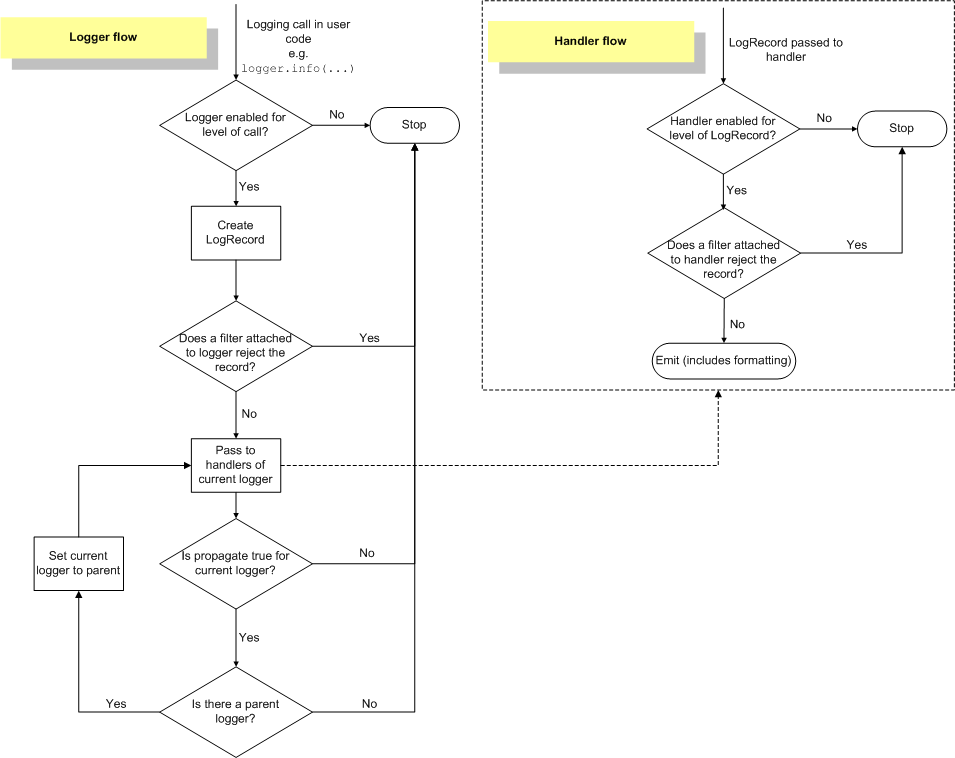

Logger 객체는 세 가지 작업
- 응용 프로그램이 실행시간에 메시지를 기록 할 수 있도록 여러 메서드를 응용 프로그램 코드에 노출
- 로거 객체는 심각도 (기본 필터링 장치) 또는 필터 객체에 따라 어떤 로그 메시지를 처리할지 결정
- 로거 객체는 관련 로그 메시지를 관심 있는 모든 로그 처리기로 전달합니다.

Loger 객체 구성 메서드
- 구성
    - Logger.setLevel() :  로거가 처리할 가장 낮은 심각도의 로그 메시지를 지정합니다. debug은 가장 낮은 내장 심각도 수준이고 critical은 가장 높은 내장 심각도입니다. 예를 들어, 심각도 수준이 INFO이면 로거는 INFO, WARNING, ERROR 및 CRITICAL 메시지만 처리하고 DEBUG 메시지는 무시합니다.
    - Logger.addHandler() 와 Logger.removeHandler() : 로거 객체에서 처리기 객체를 추가하고 제거함
    - Logger.addFilter() 와 Logger.removeFilter() : 로거 객체에서 필터 객체를 추가하고 제거함

로그 메시지
- Logger.debug(), Logger.info(), Logger.warning(), Logger.error() 그리고 Logger.critical() :  모두 메시지 와 메서드 이름에 해당하는 수준으로 로그 레코드를 만듭니다. 메시지는 실제로는 포맷 문자열이며, %s, %d, %f 등의 표준 문자열 치환 문법을 포함 할 수 있습니다. 나머지 인자들은 메시지의 치환 필드에 해당하는 객체 목록입니다. **kwargs 의 경우, 로깅 메서드는 exc_info 라는 키워드에 대해서만 신경을 쓰고 예외 정보를 로깅 할지를 결정할 때 사용합니다.
- Logger.exception() : Logger.error() 와 비슷한 로그 메시지를 생성합니다. 차이점은 Logger.exception() 가 스택 트레이스를 덤프한다는 것입니다. 예외 처리기에서만 이 메서드를 호출하십시오.
- Logger.log() : 명시적 인자로 로그 수준을 받아들입니다. 위에 나열된 로그 수준 편의 메서드를 사용하는 것보다 로깅 메시지를 만들 때 더 장황해지지만, 사용자 정의 로그 수준으로 로깅 하는 방법입니다.

처리기
- Handler 객체는 (로그 메시지의 심각도를 기반으로) 적절한 로그 메시지를 처리기의 지정된 대상으로 전달하는 역할
- Logger 객체는 addHandler() 메서드를 사용하여 0개 이상의 처리기 객체를 자신에게 추가
    - setLevel() 메서드는 로거 객체에서와 마찬가지로 적절한 목적지로 보내지는 가장 낮은 심각도를 지정
    - setFormatter() 는 처리기가 사용할 포매터 객체를 선택
    - addFilter() 와 removeFilter() 는 각각 처리기에서 필터 객체를 구성하고 해제
- 유용한 처리기
    - StreamHandler 인스턴스는 스트림(파일류 객체)에 메시지를 보냅니다.
    - FileHandler 인스턴스는 디스크 파일에 메시지를 보냅니다.
    - BaseRotatingHandler 는 특정 지점에서 로그 파일을 회전시키는 처리기의 베이스 클래스입니다. 직접 인스턴스화하는 것은 아닙니다. 대신 RotatingFileHandler 또는 TimedRotatingFileHandler 를 사용하십시오.
    - RotatingFileHandler 인스턴스는 디스크 파일에 메시지를 보내는데, 최대 로그 파일 크기와 로그 파일 회전을 지원
    - TimedRotatingFileHandler 인스턴스는 디스크 파일에 메시지를 보내는데, 일정한 시간 간격으로 로그 파일을 회전
    - SocketHandler 인스턴스는 TCP/IP 소켓에 메시지를 보냄
    - DatagramHandler 인스턴스는 UDP 소켓에 메시지를 보냄
    - SMTPHandler 인스턴스는 지정된 전자 우편 주소로 메시지를 보냄
    - SysLogHandler 인스턴스는 유닉스 syslog 데몬(원격 기계에 있는 것도 가능합니다)에 메시지를 보냄
    - NTEventLogHandler 인스턴스는 윈도우 NT/2000/XP 이벤트 로그에 메시지를 보냄
    - MemoryHandler 인스턴스는 메모리에 있는 버퍼에 메시지를 보내는데, 특정 기준이 만족 될 때마다 플러시 됨
    - HTTPHandler 인스턴스는 GET 또는 POST 을 사용해서 HTTP 서버에 메시지를 보냄
    - WatchedFileHandler 인스턴스는 그들이 로깅하고 있는 파일을 감시, 파일이 변경되면 닫히고 파일 이름을 사용하여 다시 열립니다. 이 처리기는 유닉스 계열 시스템에서만 유용합니다; 윈도우는 사용된 하부 메커니즘을 지원하지 않음
    - QueueHandler 인스턴스는 queue 또는 multiprocessing 모듈에 구현된 것과 같은 큐로 메시지를 보냄
    - NullHandler 인스턴스는 에러 메시지로 아무것도 하지 않음, 라이브러리 개발자가 로깅을 사용하지만, 라이브러리 사용자가 로깅을 구성하지 않으면 표시될 수 있는 〈No handlers could be found for logger XXX〉 라는 메시지를 피하려고 할 때 사용합니다. 

포매터 
- 포매터 객체는 로그 메시지의 최종 순서, 구조 및 내용을 구성
- 베이스 logging.Handler 클래스와는 달리, 응용 프로그램 코드는 포매터 클래스를 인스턴스화
- logging.Formatter.__init__(fmt=None, datefmt=None, style='%')
    - 기본 날짜 형식 : %Y-%m-%d %H:%M:%S



In [ ]:
import logging

# create logger
logger = logging.getLogger('simple_example')
logger.setLevel(logging.DEBUG)

# create console handler and set level to debug
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)

# create formatter
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')

# add formatter to ch
ch.setFormatter(formatter)

# add ch to logger
logger.addHandler(ch)

# 'application' code
logger.debug('debug message')
logger.info('info message')
logger.warning('warn message')
logger.error('error message')
logger.critical('critical message')

2022-01-21 05:29:21,698 - simple_example - DEBUG - debug message
DEBUG:simple_example:debug message
2022-01-21 05:29:21,703 - simple_example - INFO - info message
INFO:simple_example:info message
2022-01-21 05:29:21,707 - simple_example - WARNING - warn message
2022-01-21 05:29:21,711 - simple_example - ERROR - error message
ERROR:simple_example:error message
2022-01-21 05:29:21,715 - simple_example - CRITICAL - critical message
CRITICAL:simple_example:critical message


In [ ]:
import logging
import logging.config

logging.config.fileConfig('logging.conf')

# create logger
logger = logging.getLogger('simpleExample')

# 'application' code
logger.debug('debug message')
logger.info('info message')
logger.warning('warn message')
logger.error('error message')
logger.critical('critical message')

In [ ]:
[loggers]
keys=root,simpleExample

[handlers]
keys=consoleHandler

[formatters]
keys=simpleFormatter

[logger_root]
level=DEBUG
handlers=consoleHandler

[logger_simpleExample]
level=DEBUG
handlers=consoleHandler
qualname=simpleExample
propagate=0

[handler_consoleHandler]
class=StreamHandler
level=DEBUG
formatter=simpleFormatter
args=(sys.stdout,)

[formatter_simpleFormatter]
format=%(asctime)s - %(name)s - %(levelname)s - %(message)s